In [1]:
import numpy as np
from math import sin, pi, cos
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

from fem.twod_deterministic import solve_system, L2_error

# The Exact Solution

In [2]:
def u(x, y):
    return sin(pi*x)*sin(pi*y)

xs = np.linspace(0, 1, 512)
ys = np.linspace(0, 1, 512)
us = np.array([u(x, y) for x in xs for y in ys]).reshape((512, 512))

#fig, ax = plt.subplots(1)
#p = ax.pcolor(xs, ys, us, cmap='viridis')
#ax.set_xlabel(r"$x$", fontsize=18)
#ax.set_ylabel(r"$y$", fontsize=18)
#fig.colorbar(p)
#fig.savefig('twod-deterministic-exact.pdf')

In [3]:
def do_fem(f, a, b, c):
   
    NS = [4, 8 , 16, 32, 64, 128, 256, 512]
    errors = []
    
    # For each mesh density
    for N in NS:
        
        # Solve the system
        xs, ys, U = solve_system(f, N, a, b, c)
        
        # Calculate the error
        errors.append(L2_error(u, U, N))
        
        # Plot one of the results
        if N == 64:
            fig, ax = plt.subplots(1)
            p = ax.pcolor(xs, ys, U, cmap='viridis')
            ax.set_xlabel(r"$x$", fontsize=18)
            ax.set_ylabel(r"$y$", fontsize=18)
            fig.colorbar(p)
            fig.savefig('twod-deterministic-approx.pdf')
            
    return (NS, errors)

## a = 1, b = 0, c = 0

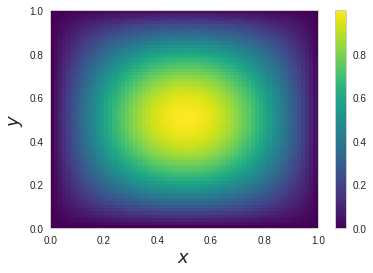

In [4]:
def f(x, y):
    return (2*pi**2) * (sin(pi * x)) * (sin(pi * y))


errors = do_fem(f, 1, [0,0], 0)

In [5]:
NS = errors[0]
cases = [errors[1]]

## a = 1, b = 0, c = 1

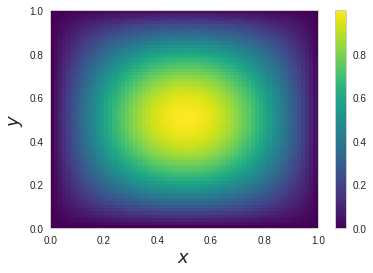

In [6]:
def f(x, y):
    return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) + sin(pi * x) * sin(pi * y)


errors = do_fem(f, 1, [0,0], 1)

In [7]:
cases.append(errors[1])

## a = 1, b = 0, c = 10 

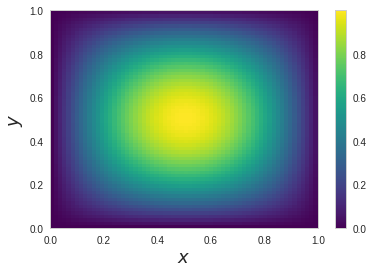

In [8]:
def f(x, y):
    return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) + 10 * sin(pi * x) * sin(pi * y)


errors = do_fem(f, 1, [0,0], 10)

In [9]:
cases.append(errors[1])

## a = 1, b = (1, 0), c = 0

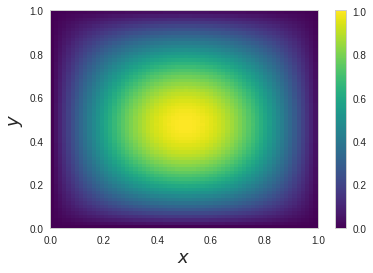

In [10]:
def f(x, y):
    return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) +  (pi * cos(pi * x)*sin(pi * y))


errors = do_fem(f, 1, [1,0], 0)

In [11]:
cases.append(errors[1])

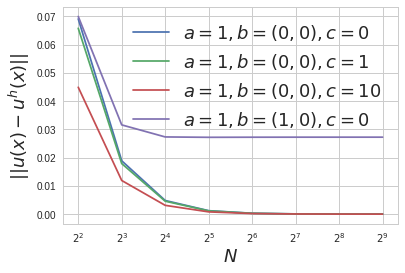

In [12]:
fig, ax = plt.subplots(1)
ax.set_xscale('log', basex=2)
ax.set_xlabel(r'$N$', fontsize=18)
ax.set_ylabel(r'$||u(x) - u^h(x)||$', fontsize=18)
ax.plot(NS, cases[0], label=r"$a = 1, b = (0, 0), c = 0$")
ax.plot(NS, cases[1], label=r"$a = 1, b = (0, 0), c = 1$")
ax.plot(NS, cases[2], label=r"$a = 1, b = (0, 0), c = 10$")
ax.plot(NS, cases[3], label=r"$a = 1, b = (1, 0), c = 0$")
ax.legend(fontsize=18, loc=0)
fig.savefig('twod-deterministic-errors.pdf')

In [13]:
cases[3]

[0.06993115909891966,
 0.03156688832210583,
 0.027304196687608005,
 0.027172502546978505,
 0.027207683162797355,
 0.027220828859579316,
 0.02722438962821441,
 0.02722529710845739]